# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

df = pd.read_csv("superheroes_nlp_dataset.csv")

power_cols = [c for c in df.columns if c.startswith("has_")]
print("Number of power columns:", len(power_cols))
power_cols[:10]

df[power_cols] = df[power_cols].fillna(0).astype(int)


Number of power columns: 50


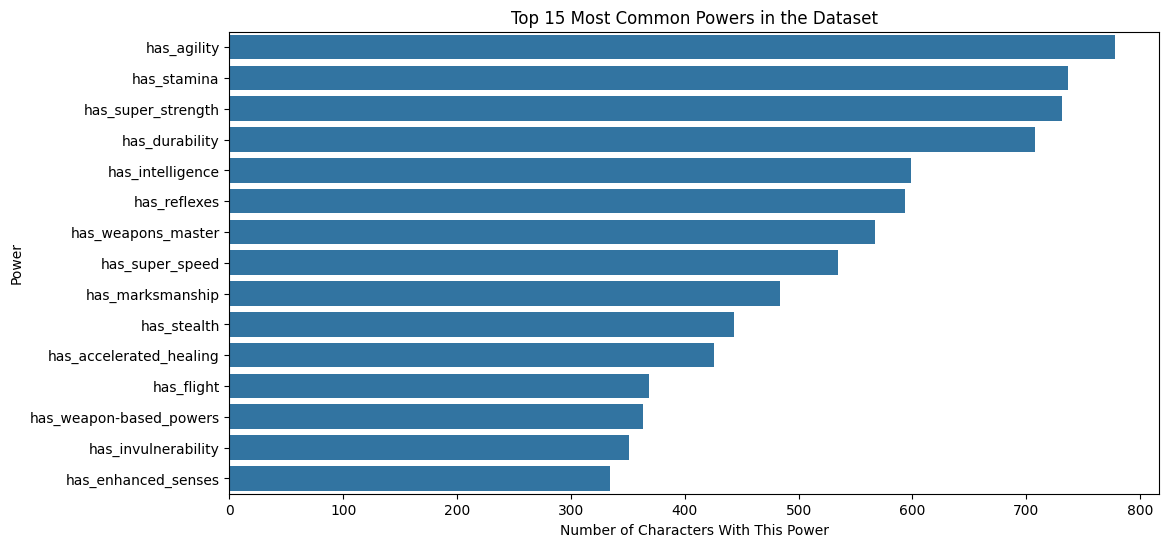

In [7]:
power_counts = df[power_cols].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=power_counts.values, y=power_counts.index)
plt.title("Top 15 Most Common Powers in the Dataset")
plt.xlabel("Number of Characters With This Power")
plt.ylabel("Power")
plt.show()


This bar chart shows the 15 most common powers across all superhero characters in the dataset. It highlights the most frequently occurring abilities and shows which traits appear to define “typical” superheroes (such as strength, durability, speed, and flight).

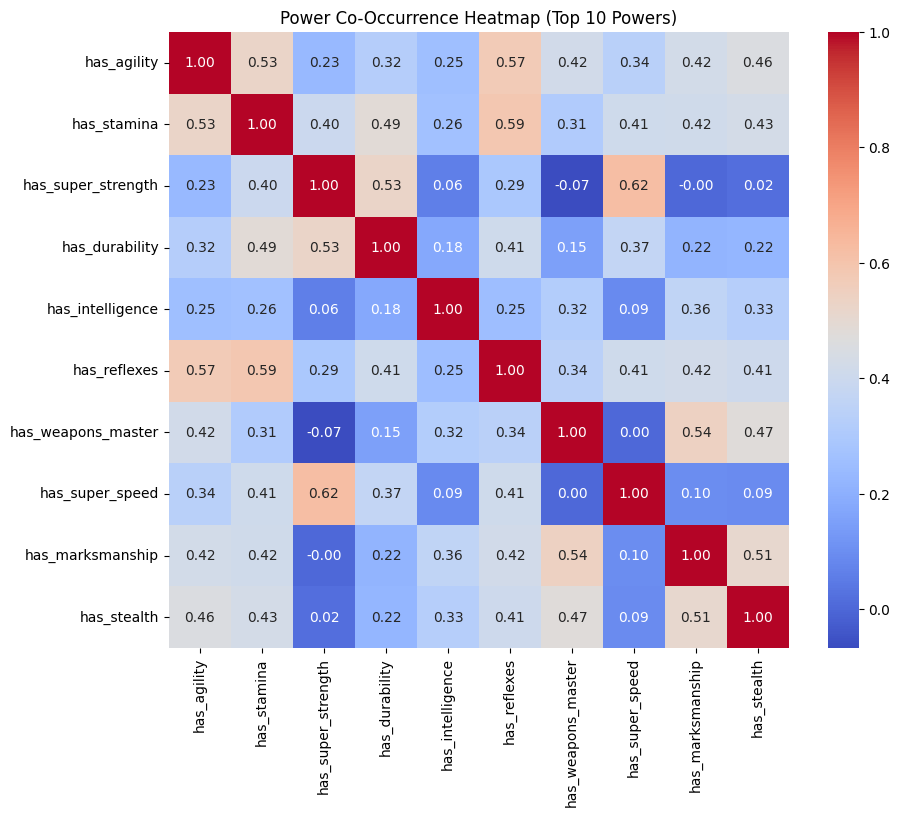

In [8]:
top10 = df[power_cols].sum().sort_values(ascending=False).head(10).index.tolist()
top10

# correlation across binary power columns (gives relationship strength)
corr = df[top10].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Power Co-Occurrence Heatmap (Top 10 Powers)")
plt.show()


This heatmap shows which powers tend to appear together among the most common superhero abilities. Strong positive relationships suggest power “clusters” (for example, characters with super strength often also have durability or stamina), which helps reveal common character archetypes.

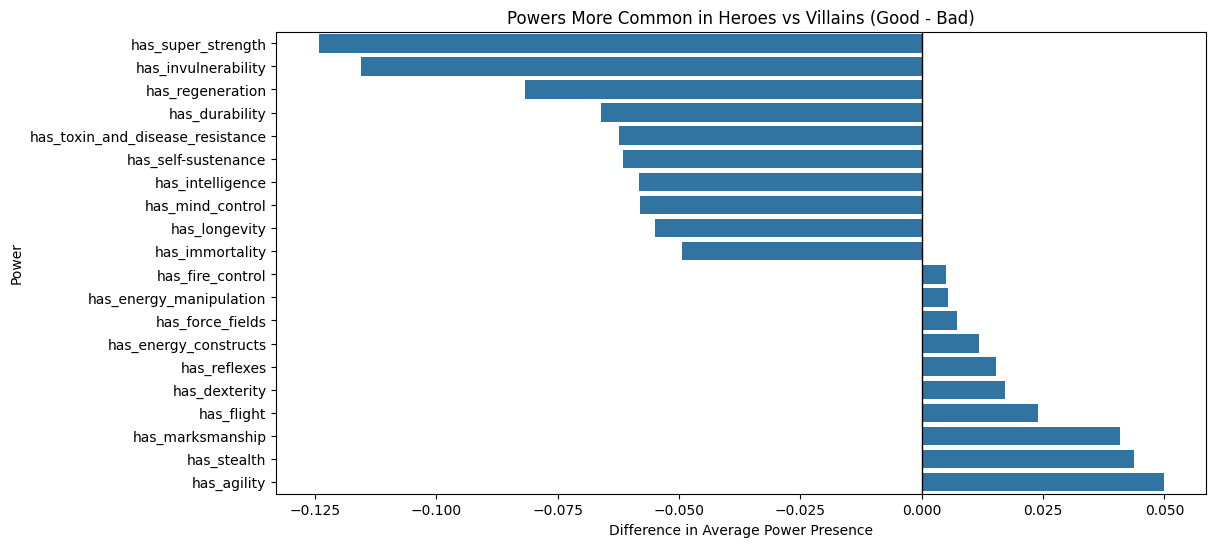

In [9]:
df["alignment"] = df["alignment"].fillna("unknown").astype(str).str.lower()

# keep only clear hero vs villain for easier comparison
align_df = df[df["alignment"].isin(["good", "bad"])].copy()
align_df["alignment"].value_counts()


good_means = align_df[align_df["alignment"] == "good"][power_cols].mean()
bad_means = align_df[align_df["alignment"] == "bad"][power_cols].mean()

diff = (good_means - bad_means).sort_values()

# Top 10 "villain leaning" powers and top 10 "hero leaning" powers
villain_like = diff.head(10)
hero_like = diff.tail(10)

compare_df = pd.concat([villain_like, hero_like]).reset_index()
compare_df.columns = ["power", "difference_good_minus_bad"]

plt.figure(figsize=(12,6))
sns.barplot(data=compare_df, x="difference_good_minus_bad", y="power")
plt.axvline(0, color="black", linewidth=1)
plt.title("Powers More Common in Heroes vs Villains (Good - Bad)")
plt.xlabel("Difference in Average Power Presence")
plt.ylabel("Power")
plt.show()



This chart compares the average presence of each power between heroes and villains, showing which powers are more common for each group. Powers with negative values appear more often in villains, while positive values appear more often in heroes, helping reveal how character alignment relates to ability patterns.